In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/Users/admin/Downloads/Comcast_telecom_complaints_data.csv")

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
df.shape

(2224, 11)

In [7]:
#- Provide the trend chart for the number of complaints at monthly and daily granularity levels.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [9]:
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [11]:
df=df.set_index('Date_month_year')

Text(0.5, 1.0, 'Monthly Trend chart')

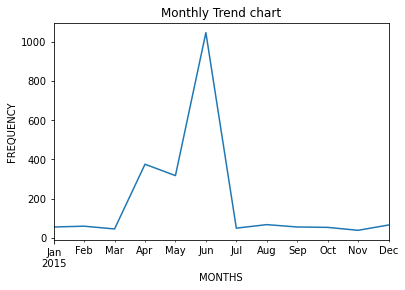

In [16]:
months=df.groupby(pd.Grouper(freq='M')).size().plot()
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("Monthly Trend chart")



In [14]:
months

Date_month_year
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

In [17]:
#Plotting Daily chart

Text(0.5, 1.0, 'Daily Trend Chart')

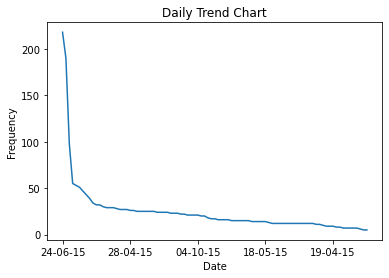

In [20]:
df=df.sort_values(by='Date')

df['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Daily Trend Chart")

In [21]:
#Provide a table with the frequency of complaint types.

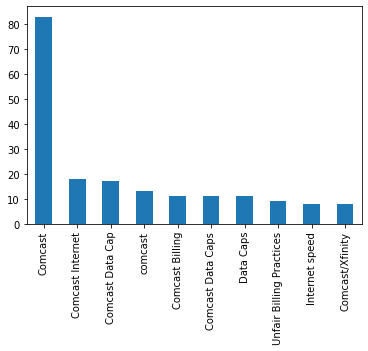

In [26]:
df['Customer Complaint'].value_counts()[:10].plot.bar()


In [27]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [31]:
internet_issue1=df[df['Customer Complaint'].str.contains('network')].count()
internet_issue2=df[df['Customer Complaint'].str.contains('internet')].count()
internet_issue3=df[df['Customer Complaint'].str.contains('speed')].count()
internet_issue4=df[df['Customer Complaint'].str.contains('data')].count()

In [32]:
billing_issue1=df[df['Customer Complaint'].str.contains('billing')].count()
billing_issue2=df[df['Customer Complaint'].str.contains('bill')].count()
billing_issue3=df[df['Customer Complaint'].str.contains('charges')].count()

In [33]:
service_issue1=df[df['Customer Complaint'].str.contains('service')].count()
Service_issue2=df[df['Customer Complaint'].str.contains('customer')].count()

In [34]:
total_internet_issue=internet_issue1+internet_issue2+internet_issue3+internet_issue4

In [35]:
total_billing_issue=billing_issue1+billing_issue2+billing_issue3

In [36]:
total_service_issue=service_issue1+Service_issue2

In [37]:
total_internet_issue,total_billing_issue,total_service_issue

(Ticket #                       374
 Customer Complaint             374
 Date                           374
 Time                           374
 Received Via                   374
 City                           374
 State                          374
 Zip code                       374
 Status                         374
 Filing on Behalf of Someone    374
 dtype: int64,
 Ticket #                       353
 Customer Complaint             353
 Date                           353
 Time                           353
 Received Via                   353
 City                           353
 State                          353
 Zip code                       353
 Status                         353
 Filing on Behalf of Someone    353
 dtype: int64,
 Ticket #                       360
 Customer Complaint             360
 Date                           360
 Time                           360
 Received Via                   360
 City                           360
 State                          36

In [38]:
other_issue=2224-(total_internet_issue+total_billing_issue+total_service_issue)

In [39]:
other_issue

Ticket #                       1137
Customer Complaint             1137
Date                           1137
Time                           1137
Received Via                   1137
City                           1137
State                          1137
Zip code                       1137
Status                         1137
Filing on Behalf of Someone    1137
dtype: int64

In [40]:
 #Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [42]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [43]:
df['NewStatus']=['Open' if status=='Open' or status=="Pending" else 'Closed'  for status in df['Status']]

In [45]:
df.sample(10)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,NewStatus
Date_month_year,,,,,,,,,,,
2015-05-06,324947,Billing Dispute,06-05-15,11:00:26 AM,Customer Care Call,Rockford,Illinois,61108,Solved,No,Closed
2015-04-04,218043,comcast services,04-04-15,5:32:05 PM,Internet,Denver,Colorado,80227,Closed,No,Closed
2015-06-24,361037,Comcast Rates,24-06-15,9:42:09 AM,Customer Care Call,Memphis,Tennessee,38117,Solved,No,Closed
2015-06-17,347369,HBO GO on Playstation 4,17-06-15,8:41:23 PM,Internet,Annville,Pennsylvania,17003,Solved,No,Closed
2015-05-25,305865,comcast service overcharge for internet and phone,25-05-15,1:50:01 PM,Internet,Hollywood,Florida,33019,Solved,No,Closed
2015-06-26,367614,Lack of Service and Misleading Promises,26-06-15,10:30:23 AM,Customer Care Call,Jacksonville,Florida,32204,Solved,No,Closed
2015-07-04,222882,Comcast broke 36 month contract by increasing ...,04-07-15,8:06:42 PM,Customer Care Call,El Dorado Hills,California,95762,Closed,No,Closed
2015-06-30,373954,Comcast Data Charges,30-06-15,7:29:08 AM,Internet,Gadsden,Alabama,35904,Pending,No,Open
2015-05-25,305929,Comcast refused to install internet,25-05-15,2:52:58 PM,Internet,Humble,Texas,77346,Open,No,Open


In [46]:
#- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [49]:
state_complain=df.groupby(['State','NewStatus']).size().unstack()

In [50]:
state_complain

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


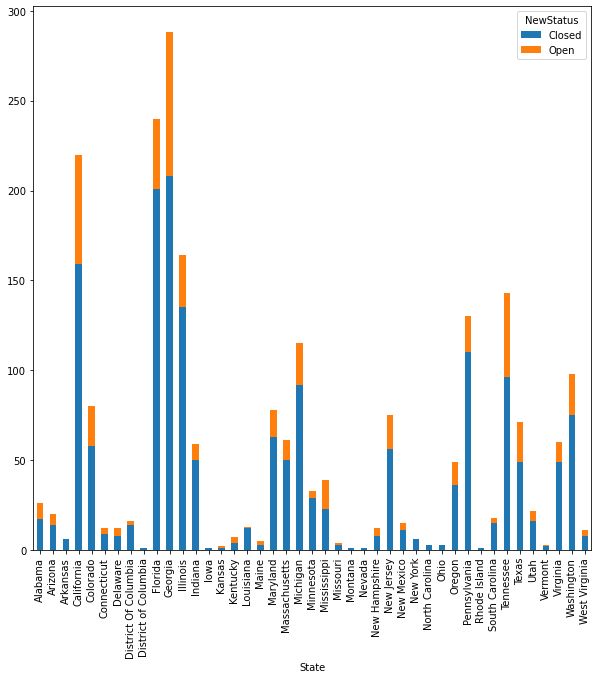

In [53]:
state_complain.plot.bar(figsize=(10,10),stacked=True)

In [54]:
#Which state has the maximum complaints

In [58]:
df.groupby(['State']).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [59]:
#Which state has the highest percentage of unresolved complaints

In [60]:
df.NewStatus.value_counts()

Closed    1707
Open       517
Name: NewStatus, dtype: int64

In [65]:
unresolved_data=df.groupby(['State','NewStatus']).size().unstack().fillna(0).sort_values('Open',
                                                                                         ascending=False)

In [67]:
unresolved_data['unresolved_cmp_perct']=unresolved_data['Open']/unresolved_data['Open'].sum()*100

In [68]:
unresolved_data

NewStatus,Closed,Open,unresolved_cmp_perct
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


In [69]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [75]:
resolved_data=df.groupby(['Received Via','NewStatus']).size().unstack()

resolved_data['resolved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100

In [77]:
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

In [80]:
df.groupby(['Received Via','NewStatus']).size().unstack()

NewStatus,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262
